In [48]:
"""mnist.validation.num_examples
import matplotlib.pyplot as plt
%matplotlib inline
mnist.train.images[1].shape
imshow(mnist.train.images[1].reshape(28,28))
plt.imshow(mnist.train.images"""

'mnist.validation.num_examples\nimport matplotlib.pyplot as plt\n%matplotlib inline\nmnist.train.images[1].shape\nimshow(mnist.train.images[1].reshape(28,28))\nplt.imshow(mnist.train.images'

In [49]:
import numpy as np
import math

In [50]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

import matplotlib.pyplot as plt
%matplotlib inline

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [51]:
import tensorflow as tf

**Helper Functions**

In [52]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [53]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

Given an input tensor of shape [batch, in_height, in_width, in_channels] and a filter / kernel tensor of shape [filter_height, filter_width, in_channels, out_channels], this op performs the following:

Flattens the filter to a 2-D matrix with shape [filter_height * filter_width * in_channels, output_channels].
Extracts image patches from the input tensor to form a virtual tensor of shape [batch, out_height, out_width,
filter_height * filter_width * in_channels].
For each patch, right-multiplies the filter matrix and the image patch vector.


In [54]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [55]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')
#strides = [batch_size, height, width,input channels]
#ksize = [batch_size, height, width,input channels]

In [56]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [57]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

**Placeholders**

In [58]:
x = tf.placeholder(tf.float32,shape=[None,784]) # 28*28 = 748 (input matrix dimension)
y_true = tf.placeholder(tf.float32,shape=[None,10]) # 10 is output nodes

**Layers**

In [59]:
x_image = tf.reshape(x,[-1,28,28,1]) # -1 is for unflatting (to make into a matrix again)

In [60]:
convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [61]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [62]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024)) # 1024 output nodes
# The padding is SAME, the 1st maxpool -> 14x14 and the 2nd maxpool -> 7x7 
# If padding is "Valid", the 1st conv ->23x23 and 1st maxpool -> 11x11, the 2nd con -> 6x6 and 2nd maxpool -> 3x3

In [63]:
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob) # Drop out can only be taken placed at the fully connected layers 

In [64]:
y_pred = normal_full_layer(full_one_dropout,10)

**Loss Function**

In [65]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

**Optimizer**

In [66]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

**Initialize Variables**

In [67]:
init = tf.global_variables_initializer()
# Split the test-set into smaller batches of this size.




**Session**

In [68]:
steps = 5000

#with tf.Session() as sess:
sess = tf.Session()   
sess.run(init)
for i in range(steps):
   
   batch_x , batch_y = mnist.train.next_batch(50)
   
   sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
   
   # PRINT OUT A MESSAGE EVERY 100 STEPS
   if i%100 == 0:
       
       print('Currently on step {}'.format(i))
       print('Accuracy is:')
       # Test the Train Model
       matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
       acc = tf.reduce_mean(tf.cast(matches,tf.float32))
       print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels,hold_prob:1.0}))
       print('\n')

Currently on step 0
Accuracy is:
0.1251


Currently on step 100
Accuracy is:
0.8368


Currently on step 200
Accuracy is:
0.8977


Currently on step 300
Accuracy is:
0.9254


Currently on step 400
Accuracy is:
0.9283


Currently on step 500
Accuracy is:
0.9408


Currently on step 600
Accuracy is:
0.9491


Currently on step 700
Accuracy is:
0.953


Currently on step 800
Accuracy is:
0.9573


Currently on step 900
Accuracy is:
0.9599


Currently on step 1000
Accuracy is:
0.9601


Currently on step 1100
Accuracy is:
0.9634


Currently on step 1200
Accuracy is:
0.9648


Currently on step 1300
Accuracy is:
0.9644


Currently on step 1400
Accuracy is:
0.9667


Currently on step 1500
Accuracy is:
0.9698


Currently on step 1600
Accuracy is:
0.9702


Currently on step 1700
Accuracy is:
0.9702


Currently on step 1800
Accuracy is:
0.9715


Currently on step 1900
Accuracy is:
0.9732


Currently on step 2000
Accuracy is:
0.973


Currently on step 2100
Accuracy is:
0.9764


Currently on step 2200
A

Now we define a couple functions that will allow us to visualize the network. The first one, gets the activations at a given layer for a given input image. The second plots those activations in a grid.

In [69]:
def getActivations(layer,stimuli):
    #units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F')})
    plotNNFilter(units)

In [70]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Feature map ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")


Now we can choose an image to pass through the network to visualize the network activation, and look at the raw pixels of that image.

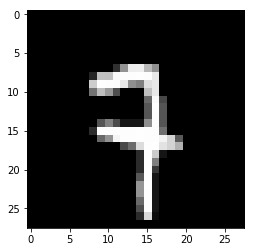

In [71]:
intrested_image = 1012
imageToUse = mnist.test.images[intrested_image]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

Now we can look at how that image activates the neurons of the first convolutional layer. Notice how each filter has learned to activate optimally for different features of the image.

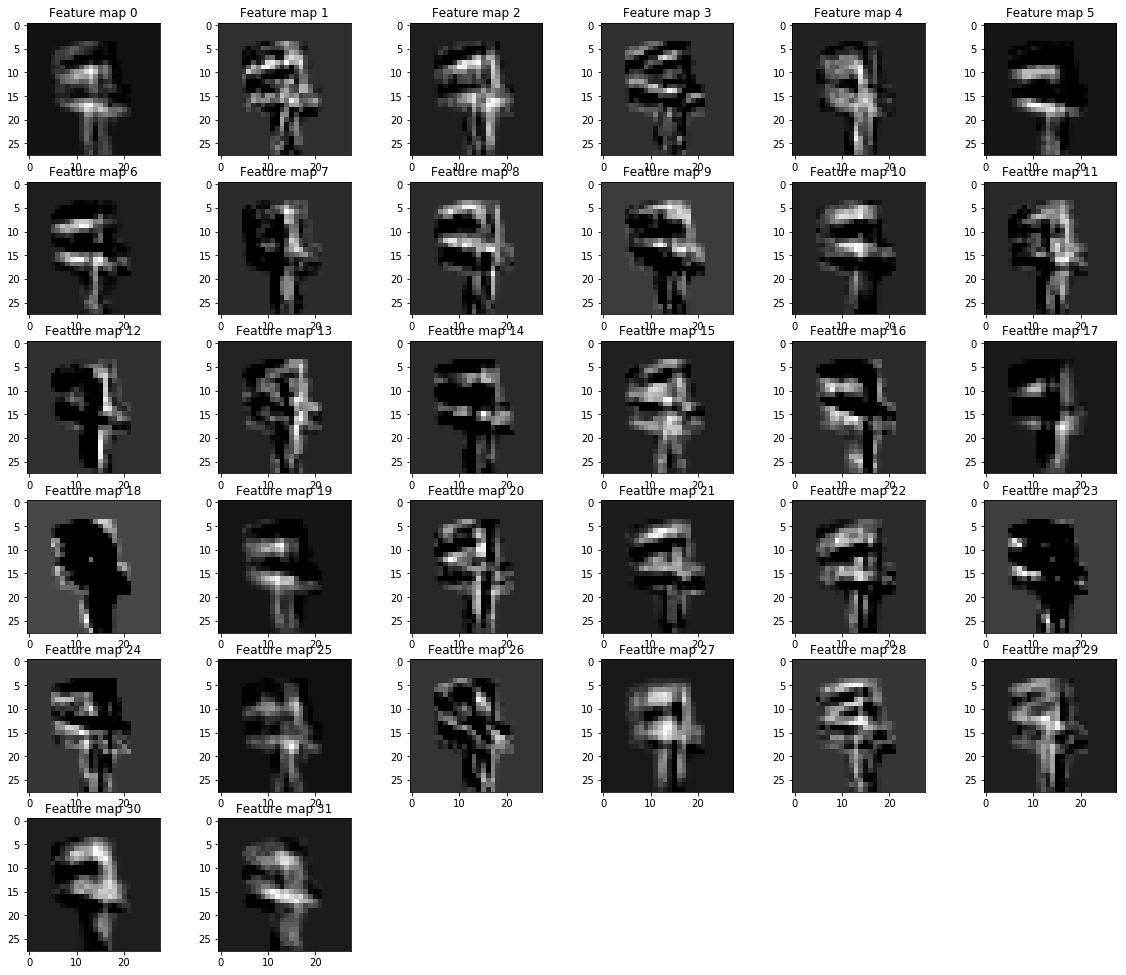

In [72]:
getActivations(convo_1,imageToUse)


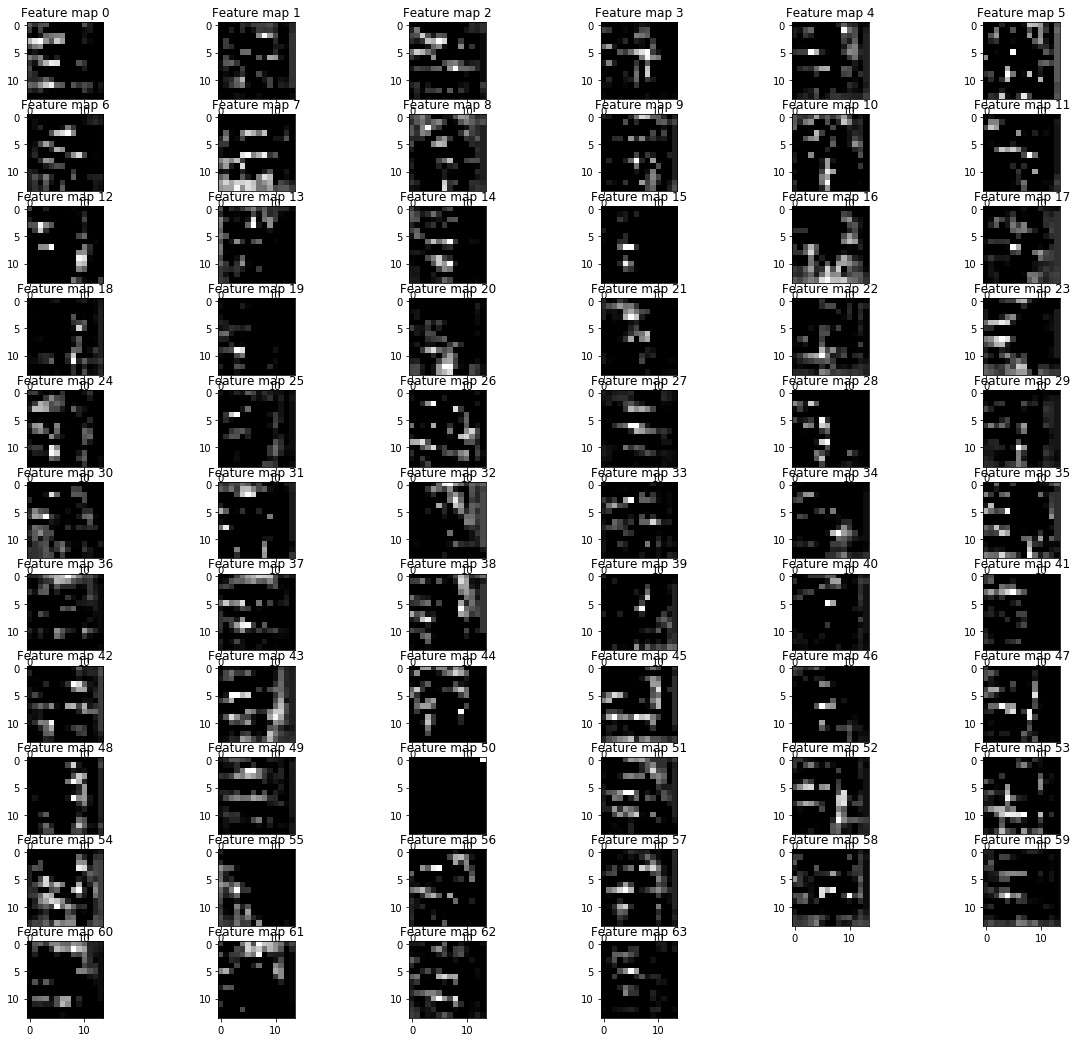

In [73]:
getActivations(convo_2,imageToUse)


[-8.12749004 -1.77540612  1.26267505  5.90673494 -1.34467483 -1.66942072
 -6.00451612  7.50598669 -2.08013678  4.8126955 ]


<Container object of 10 artists>

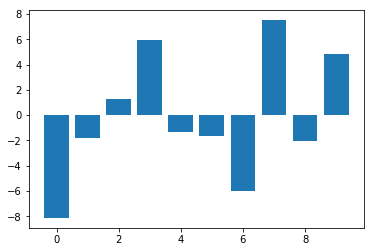

In [74]:
test_out_y = sess.run(y_pred, feed_dict={x:mnist.test.images,y_true:mnist.test.labels, hold_prob:1.0})

test_out_y.shape 

print(test_out_y[intrested_image])

plt.bar(np.arange(len(test_out_y[intrested_image])), test_out_y[intrested_image])

